In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

# Assignment
In this assignment, we'll be working with the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

## 1. Produce dendrograms for the heart disease dataset using three different linkage methods: `complete`, `average`, and `ward`. Which linkage method do you think produces more reasonable result?

### Load the Dataset

In [2]:
#Database Credentials:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Use the connection to extract SQL data
heartdisease_df = pd.read_sql_query('SELECT * FROM heartdisease', con=engine)

# Close the connection
engine.dispose()

### Pre-Processing

In [4]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

### Produce Dendograms

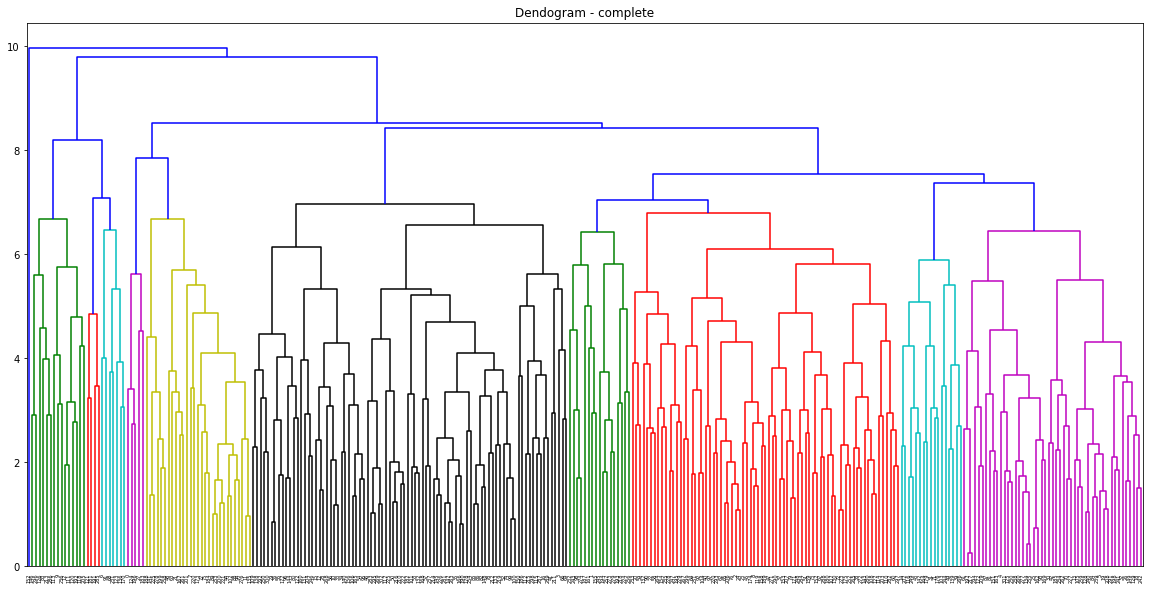

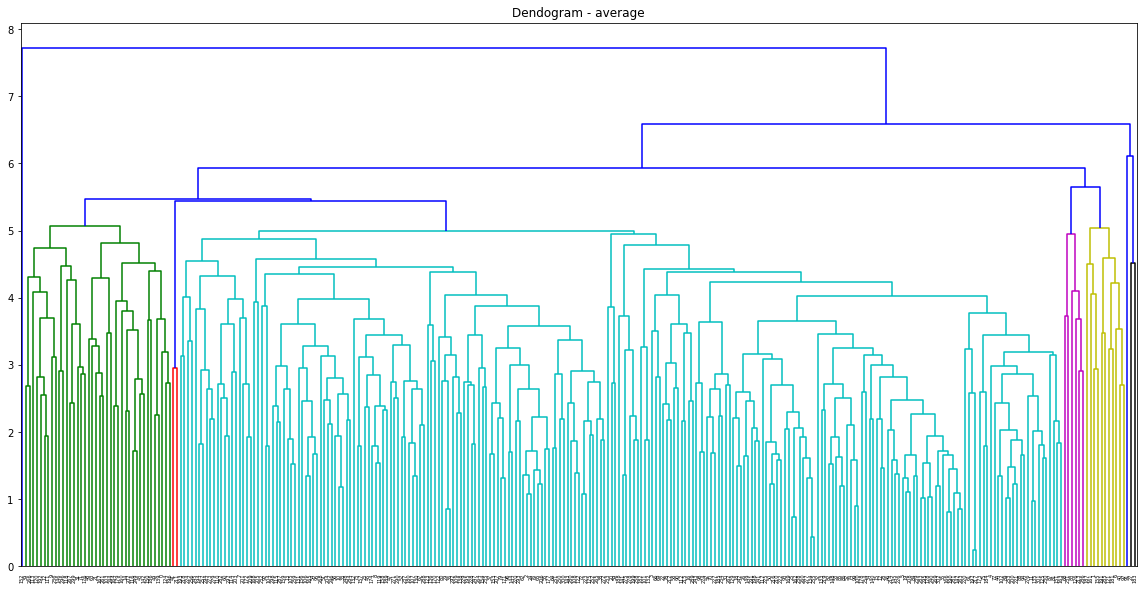

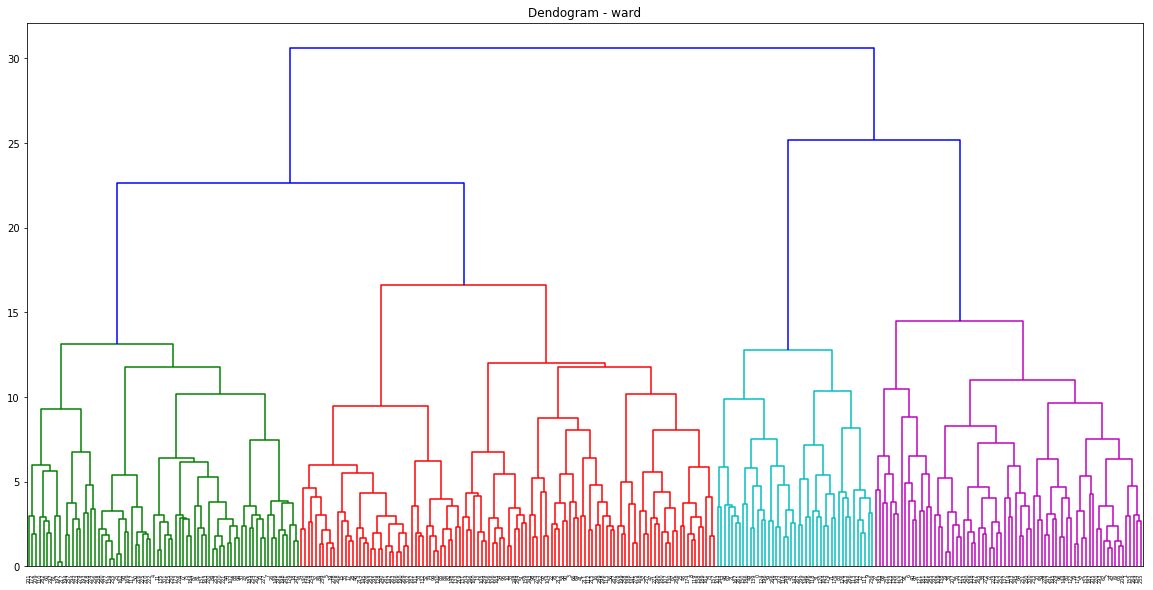

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

for link in ['complete', 'average', 'ward']:
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_std, method=link))
    plt.title('Dendogram - ' + link)
    plt.show()

The final dendogram, produced with the 'ward' method, seems to have the most sensible results. The other two dendograms show too few members in some of the clusters to make much sense.

## 2. Apply agglomerative clustering to the heart disease data by setting `n_clusters`=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [17]:
from sklearn.cluster import AgglomerativeClustering

affinities = ['cosine', 'cosine', 'euclidean']
linkages = ['complete', 'average', 'ward']
for i in range(len(linkages)):
    # Defining the agglomerative clustering
    agg_cluster = AgglomerativeClustering(linkage=linkages[i], 
                                          affinity=affinities[i],
                                          n_clusters=2)

    # Fit model
    clusters = agg_cluster.fit_predict(X_std)
    
    print("Adjusted Rand Index of the Agglomerative Clustering solution, utilizing the {} method: {}"
          .format(linkages[i], metrics.adjusted_rand_score(y, clusters)))
    print("Silhoutte Score of the Agglomerative Clustering solution, utilizing the {} method: {}"
          .format(linkages[i], metrics.silhouette_score(X_std, clusters, metric=affinities[i])))
    print('\n-----------------------------------------------------------------------------------------\n')

Adjusted Rand Index of the Agglomerative Clustering solution, utilizing the complete method: 0.21394030618551016
Silhoutte Score of the Agglomerative Clustering solution, utilizing the complete method: 0.1900255356793155

-----------------------------------------------------------------------------------------

Adjusted Rand Index of the Agglomerative Clustering solution, utilizing the average method: 0.2940490133353465
Silhoutte Score of the Agglomerative Clustering solution, utilizing the average method: 0.23325509557943136

-----------------------------------------------------------------------------------------

Adjusted Rand Index of the Agglomerative Clustering solution, utilizing the ward method: 0.146129913123814
Silhoutte Score of the Agglomerative Clustering solution, utilizing the ward method: 0.13871973665572218

-----------------------------------------------------------------------------------------



The best-performing linkage method, with respect to both Adjusted Rand Index and Silhouette Score, is `average`, with scores of 29.4% and 23.3%, respectively. In the previous assignment, the best scores were 43.7% and 17.4%, respectively. Therefore, k-means is a better method with respect to Adjusted Rand Index, and agglomerative clustering with `average` linkage method is the better method with respect to Silhouette Score.